In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


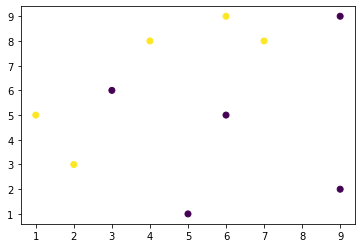

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=df["X1"],y=df["X2"],c=df.label)


<AxesSubplot:xlabel='X1', ylabel='X2'>

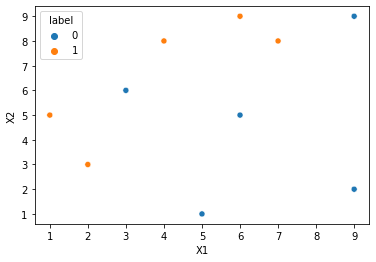

In [6]:
import seaborn as sns
sns.scatterplot(x=df.X1,y=df.X2,hue=df.label)

In [7]:
df["weights"]=1/df.shape[0]

In [8]:
df.head()

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1=DecisionTreeClassifier(max_depth=1)#max_depth should be 1

In [11]:
X=df.iloc[:,:2].values
y=df.iloc[:,-2].values

In [12]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [13]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

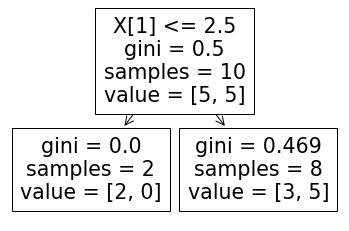

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

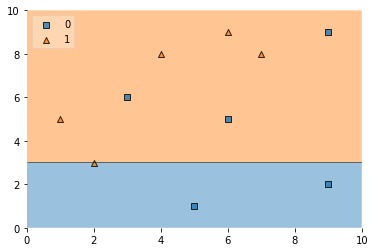

In [15]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [16]:
df["y_pred"]=dt1.predict(X)

In [17]:
df.head()

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0


In [18]:
 def calculate_model_weight(error):
        return .5*np.log((1-error)/(error))

In [19]:
alpha1=calculate_model_weight(.3)

In [20]:
alpha1

0.42364893019360184

In [21]:
# update_weight
def update_row_weights(row,alpha=.423):
    if row["label"]==row["y_pred"]:
        return row["weights"]*np.exp(-alpha)
    else:
        return row["weights"]*np.exp(alpha)

In [22]:
df["update_weight"]=df.apply(update_row_weights,axis=1)

In [23]:
df.head()

,X1,X2,label,weights,y_pred,update_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508


In [24]:
df["update_weight"].sum()

0.9165153319682015

In [25]:
df["nomalized_weights"]=df["update_weight"]/df["update_weight"].sum()

In [26]:
df.head()

,X1,X2,label,weights,y_pred,update_weight,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475


In [28]:
df["nomalized_weights"].sum()

1.0

In [29]:
df['cumsum_upper']=np.cumsum(df['nomalized_weights'])

In [30]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [31]:
df.head()

,X1,X2,label,weights,y_pred,update_weight,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983


In [34]:
df[['X1','X2','label','weights','y_pred','update_weight','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,update_weight,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [89]:

def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [90]:
index_values = create_new_dataset(df)

index_values

[6, 8, 3, 2, 9, 9, 8, 5, 1, 3]

In [85]:
second_df = df.iloc[index_values,[0,1,2,3]]


In [81]:
second_df

,X1,X2,label,weights
2,3,6,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
2,3,6,0,0.1
4,5,1,0,0.1


In [82]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [40]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [42]:
dt2.fit(X,y)


DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 2.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]')]

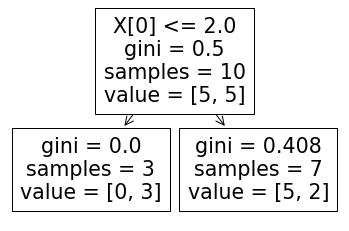

In [43]:

plot_tree(dt2)
     

<AxesSubplot:>

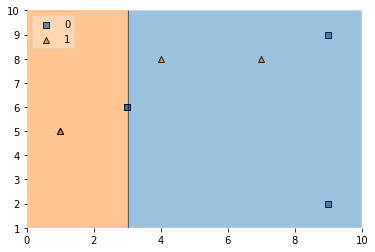

In [44]:
plot_decision_regions(X, y, clf=dt2, legend=2)


In [45]:
second_df['y_pred'] = dt2.predict(X)
     

In [46]:
alpha2 = calculate_model_weight(0.1)

In [47]:
alpha2

1.0986122886681098

In [48]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [49]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)


In [50]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
7,7,8,1,0.1,0,0.297427
0,1,5,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
3,4,8,1,0.1,0,0.297427
2,3,6,0,0.1,0,0.033622


In [51]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()


In [52]:

second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
7,7,8,1,0.1,0,0.297427,0.344313
0,1,5,1,0.1,1,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
0,1,5,1,0.1,1,0.033622,0.038922
3,4,8,1,0.1,0,0.297427,0.344313
2,3,6,0,0.1,0,0.033622,0.038922


In [53]:

second_df['nomalized_weights'].sum()
     

0.9999999999999999

In [54]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])


In [55]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']


In [56]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.038922,0.000000,0.038922
2,3,6,0,0.1,0,0.038922,0.038922,0.077843
9,9,2,0,0.1,0,0.038922,0.077843,0.116765
8,9,9,0,0.1,0,0.038922,0.116765,0.155687
7,7,8,1,0.1,0,0.344313,0.155687,0.500000
0,1,5,1,0.1,1,0.038922,0.500000,0.538922
2,3,6,0,0.1,0,0.038922,0.538922,0.577843
0,1,5,1,0.1,1,0.038922,0.577843,0.616765
3,4,8,1,0.1,0,0.344313,0.616765,0.961078
2,3,6,0,0.1,0,0.038922,0.961078,1.000000


In [57]:
index_values = create_new_dataset(second_df)


In [58]:
third_df = second_df.iloc[index_values,[0,1,2,3]]


In [59]:
third_df
     

,X1,X2,label,weights
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
9,9,2,0,0.1
0,1,5,1,0.1


In [60]:

dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)
     

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

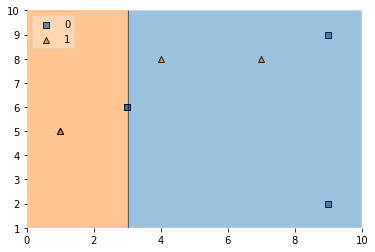

In [61]:
plot_decision_regions(X, y, clf=dt3, legend=2)


In [62]:
third_df['y_pred'] = dt3.predict(X)


In [63]:
third_df
     

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,1
0,1,5,1,0.1,0
2,3,6,0,0.1,1
9,9,2,0,0.1,0
0,1,5,1,0.1,0


In [64]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [65]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


# Prediction

In [66]:

query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
     

array([1], dtype=int64)

In [67]:
dt2.predict(query)

array([1], dtype=int64)

In [68]:
dt3.predict(query)

array([1], dtype=int64)

In [69]:
alpha1*1 + alpha2*(1) + alpha3*(1)


1.09861228866811

In [70]:

np.sign(1.09)
     

1.0

In [71]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [72]:
dt2.predict(query)

array([0], dtype=int64)

In [73]:
dt3.predict(query)

array([0], dtype=int64)

In [74]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)


-0.2513144282809062

In [75]:
np.sign(-0.25)


-1.0

In [77]:
np.random.rand()

0.3889323267327255